In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('E:/Datasets/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [5]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
497,female,group D,some college,free/reduced,completed,59,78,76
676,female,group E,some college,standard,completed,73,78,76
485,male,group C,high school,standard,none,70,74,71
228,male,group A,some high school,free/reduced,none,68,72,64
736,male,group C,associate's degree,standard,none,92,79,84


In [6]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [7]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
def clean(x):
    rs=str(x).split()
    return rs[1]
def remove(x):
    val=""
    if x=="free/reduced":
        val="reduced"
    else:
        val="standard"
    return val
        

In [11]:
data['race/ethnicity']=data['race/ethnicity'].apply(clean)

In [12]:
data['lunch']=data['lunch'].apply(remove)

In [13]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75


In [14]:
data["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [15]:
def education(x):
    rs=""
    if x=="bachelor's degree":
        rs="bachelor"
    elif x=="some college":
        rs="college"
    elif x=="master's degree":
        rs="master"
    elif x=="high school":
        rs="school"
    elif x=="some high school":
        rs="school"
    elif x=="associate's degree":
        rs="associate"
    return rs

In [16]:
data["parental level of education"]=data["parental level of education"].apply(education)

In [17]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,B,bachelor,standard,none,72,72,74
1,female,C,college,standard,completed,69,90,88
2,female,B,master,standard,none,90,95,93
3,male,A,associate,reduced,none,47,57,44
4,male,C,college,standard,none,76,78,75


## EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

c:\users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

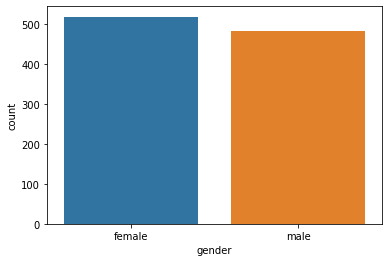

In [20]:
sns.countplot(data['gender'])

In [21]:
pd.crosstab(data['gender'],data['parental level of education']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

parental level of education,associate,bachelor,college,master,school
gender,,,,,
female,22.4,12.2,22.8,6.9,35.7
male,22.0,11.4,22.4,4.8,39.4


In [22]:
data.groupby(["gender"])['math score'].mean()

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [23]:
data.groupby(["gender"])['writing score'].mean()

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

In [24]:
data.groupby(["gender"])['reading score'].mean()

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

c:\users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='reading score', ylabel='count'>

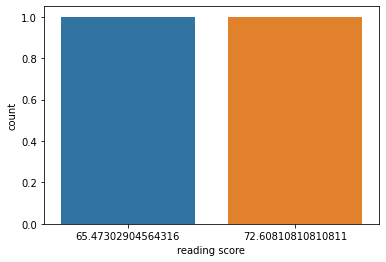

In [25]:
sns.countplot(data.groupby(["gender"])['reading score'].mean())

In [26]:
pd.crosstab(data['gender'],data['parental level of education']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

parental level of education,associate,bachelor,college,master,school
gender,,,,,
female,22.4,12.2,22.8,6.9,35.7
male,22.0,11.4,22.4,4.8,39.4


In [27]:
data.groupby(["gender","parental level of education"])['reading score'].mean()

gender  parental level of education
female  associate                      74.120690
        bachelor                       77.285714
        college                        73.550847
        master                         76.805556
        school                         68.648649
male    associate                      67.433962
        bachelor                       68.090909
        college                        64.990741
        master                         73.130435
        school                         62.968421
Name: reading score, dtype: float64

c:\users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='math score', ylabel='Density'>

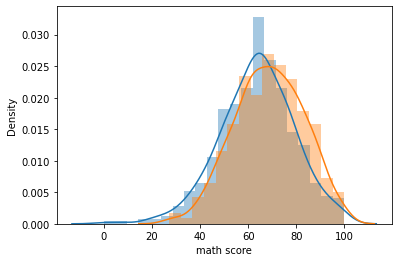

In [28]:
sns.distplot(data['math score'][data['gender']=='female'])
sns.distplot(data['math score'][data['gender']=='male'])

c:\users\user\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reading score', ylabel='Density'>

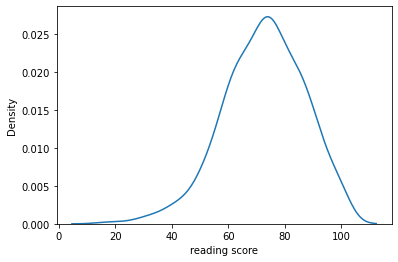

In [29]:
sns.distplot(data["reading score"][data["gender"]=="female"],kde=True,hist=False)

In [30]:
data["math score"].corr(data["reading score"])

0.8175796636720546

In [31]:
data["writing score"].corr(data["reading score"])

0.9545980771462474

In [42]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [33]:
categorical_encode=pd.get_dummies(data,columns=["gender","race/ethnicity","test preparation course","lunch"])

In [34]:
categorical_encode

,parental level of education,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_A,race/ethnicity_B,race/ethnicity_C,race/ethnicity_D,race/ethnicity_E,test preparation course_completed,test preparation course_none,lunch_reduced,lunch_standard
0,bachelor,72,72,74,1,0,0,1,0,0,0,0,1,0,1
1,college,69,90,88,1,0,0,0,1,0,0,1,0,0,1
2,master,90,95,93,1,0,0,1,0,0,0,0,1,0,1
3,associate,47,57,44,0,1,1,0,0,0,0,0,1,1,0
4,college,76,78,75,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master,88,99,95,1,0,0,0,0,0,1,1,0,0,1
996,school,62,55,55,0,1,0,0,1,0,0,0,1,1,0
997,school,59,71,65,1,0,0,0,1,0,0,1,0,1,0
998,college,68,78,77,1,0,0,0,0,1,0,1,0,0,1


In [43]:
enc = LabelEncoder()
enc.fit(categorical_encode["parental level of education"])
categorical_encode["parental level of education"] = enc.transform(categorical_encode["parental level of education"])

In [44]:
categorical_encode

,parental level of education,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_A,race/ethnicity_B,race/ethnicity_C,race/ethnicity_D,race/ethnicity_E,test preparation course_completed,test preparation course_none,lunch_reduced,lunch_standard
0,1,72,72,74,1,0,0,1,0,0,0,0,1,0,1
1,2,69,90,88,1,0,0,0,1,0,0,1,0,0,1
2,3,90,95,93,1,0,0,1,0,0,0,0,1,0,1
3,0,47,57,44,0,1,1,0,0,0,0,0,1,1,0
4,2,76,78,75,0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,88,99,95,1,0,0,0,0,0,1,1,0,0,1
996,4,62,55,55,0,1,0,0,1,0,0,0,1,1,0
997,4,59,71,65,1,0,0,0,1,0,0,1,0,1,0
998,2,68,78,77,1,0,0,0,0,1,0,1,0,0,1
